In [1]:
# 定数の設定
γ   = 1.0
u0   = 0.1
Δt  = 0.1

# 関数 f(u,U)
f(u, U) = u - U - Δt * γ * (sin((u+U)/2))^(1.2)

# 微分 df/du
df(u, U) = 1 -
  0.6 * Δt * γ * (sin((u+U)/2))^(0.2) * cos((u+U)/2)

df (generic function with 1 method)

In [2]:
# Newton 法で、U から u を求める
function newton(old_u)
    u = old_u # とりあえず、初期値を古い値の U と一致させておいて…

    for i in 1:100
      if abs( f(u,old_u) ) < 1.0e-6   # 6桁あってれば
        break   # ループ(この場合は for )から脱出する．
      end
      u = u - f(u,old_u)/df(u,old_u) # Newton 法で u を改善する．
    end

    return u # f が十分にゼロに近くなったら、近似値 u を返す
end

newton (generic function with 1 method)

In [3]:
u = u0       # 「今」の値は、もちろん最初は初期値そのもの．
u_sq = [ u ] # 初期値を配列に入れておいて…

for n in 1:100
    u = newton(u) # Newton 法で新しい時間ステップの値が求まって出てくるはず．
    push!(u_sq, u) # その値を配列に追加していく．
end

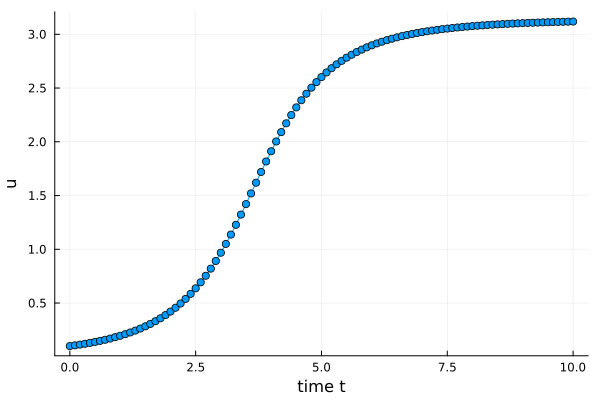

In [4]:
using Plots

t_sq = [ n*Δt for n in 0:100 ]
plot(t_sq, u_sq, marker = :circ,
  xaxis = "time t", yaxis = "u", leg = false)

In [5]:
Δt = 1.2

1.2

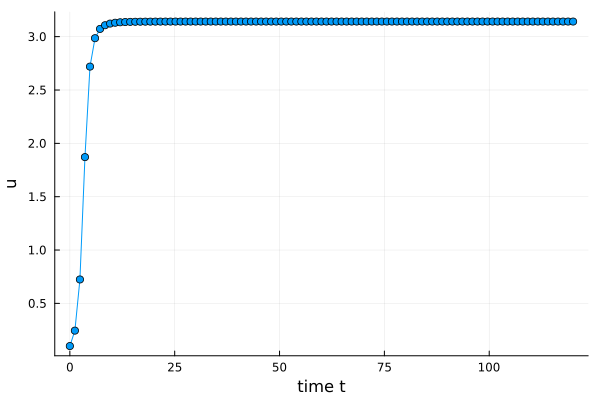

In [6]:
u = u0       # 「今」の値は、もちろん最初は初期値そのもの．
u_sq = [ u ] # 初期値を配列に入れておいて…

for n in 1:100
    u = newton(u) # Newton 法で新しい時間ステップの値が求まって出てくるはず．
    push!(u_sq, u) # その値を配列に追加していく．
end

t_sq = [ n*Δt for n in 0:100 ]
plot(t_sq, u_sq, marker = :circ,
  xaxis = "time t", yaxis = "u", leg = false)

In [7]:
using NLsolve

function nls(func, params...; ini = [0.0])
    if typeof(ini) <: Number
        r = nlsolve((vout,vin)->vout[1]=func(vin[1],params...), [ini])
        v = r.zero[1]
    else
        r = nlsolve((vout,vin)->vout .= func(vin,params...), ini)
        v = r.zero
    end
    return v, r.f_converged
end

nls (generic function with 1 method)

In [8]:
using NLsolve

function nls(func, params...; ini = [0.0])
    if typeof(ini) <: Number
        r = nlsolve((vout,vin)->vout[1]=func(vin[1],params...), [ini])
        v = r.zero[1]
    else
        r = nlsolve((vout,vin)->vout .= func(vin,params...), ini)
        v = r.zero
    end
    return v, r.f_converged
end

nls (generic function with 1 method)

In [9]:
Δt = 0.1 # 時間刻み幅を元に戻しておいて、

u_old = u0  # 「今」の値は、もちろん最初は初期値そのもの．
u_sq = [ u_old ] # 初期値を配列に入れておいて…

for n in 1:100
    u = nls(f, u_old, ini = u_old)[1]  # 関数 nls で新しい値をいきなり求める．
    push!(u_sq, u) # その値を配列に追加していく．
    u_old = u # 古い値を保持する変数に新しい値を入れて、次の時間へ
end


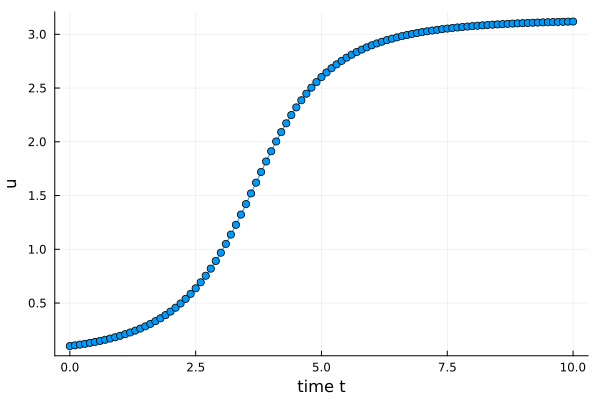

In [10]:
t_sq = [ n*Δt for n in 0:100 ]
plot(t_sq, u_sq, marker = :circ,
  xaxis = "time t", yaxis = "u", leg = false)

In [11]:
Δt = 1.2 # 時間刻み幅を大きくしてみる

u_old = u0  # 「今」の値は、もちろん最初は初期値そのもの．
u_sq = [ u_old ] # 初期値を配列に入れておいて…

for n in 1:100
    u = nls(f, u_old, ini = u_old)[1]  # 関数 nls で新しい値をいきなり求める．
    println(n, ": ", u, " ", sin((u+u_old)/2))
    push!(u_sq, u) # その値を配列に追加していく．
    u_old = u # 古い値を保持する変数に新しい値を入れて、次の時間へ
end

1: 0.2445828206408548 0.17144028204630682
2: 0.7241519610699485 0.4656486127362301
3: 1.8709232707904873 0.962896580041833
4: 2.7192167342635747 0.7489808758544224
5: 2.985520115427732 0.2852087610786438
6: 3.0725584588957093 0.1123158743514151
7: 3.1069544379675222 0.0518129943639024
8: 3.1225677124829754 0.026828358987976905
9: 3.1304047960356782 0.015105824781990605
10: 3.1346510039397333 0.009064629461162748
11: 3.1370946477756876 0.005719796543410794
12: 3.1385715278210715 0.003759556934926038
13: 3.139501169967586 0.0025563019113543084
14: 3.140106810914135 0.0017886621951831016
15: 3.140513174918811 0.00128266032161094
16: 3.1407928947061197 0.000939618639065662
17: 3.140989805063468 0.0007013036475126663
18: 3.141131196989348 0.0005321525382685236
19: 3.1412345332852865 0.0004097884410071393
20: 3.1413112628758575 0.0003197555037724399
21: 3.1413690567791157 0.00025249375962353975
22: 3.1414131562201306 0.0002015470888057806
23: 3.141447206188787 0.00016247238461971784
24: 3.14

DomainError: DomainError with -3.910542430870352e-7:
Exponentiation yielding a complex result requires a complex argument.
Replace x^y with (x+0im)^y, Complex(x)^y, or similar.

In [12]:
r(u) = (sin(u))^(1.2)

r (generic function with 1 method)

In [13]:
function RK(u)
    r1 = r(u)
    r2 = r(u + Δt/2 * r1)
    r3 = r(u + Δt/2 * r2)
    r4 = r(u + Δt * r3)
    return u + Δt * (r1 + 2*r2 + 2*r3 + r4)/6
end

RK (generic function with 1 method)

In [14]:
Δt = 0.1
u0 = 0.1

u = u0  # 最初の値はもちろん初期値
u_sq = [ u ] # 初期値を配列に入れておいて…

for n in 1:100
    u = RK(u)  # Runge-Kutta 法で新しい値をいきなり求める．
    push!(u_sq, u) # その値を配列に追加していく．
end

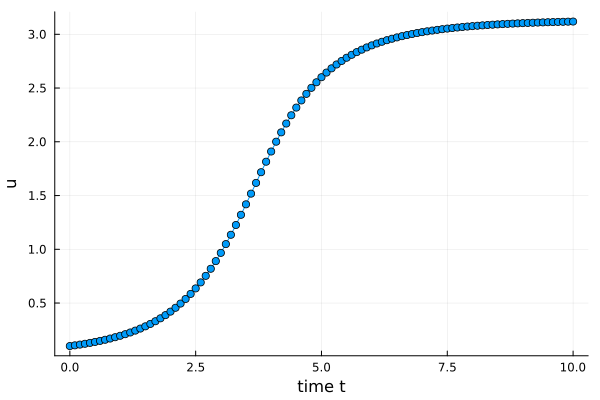

In [15]:
t_sq = [ n*Δt for n in 0:100 ]
plot(t_sq, u_sq, marker = :circ,
  xaxis = "time t", yaxis = "u", leg = false)

In [26]:
Δt = 1.51 # この値を大きくした．
u0 = 0.1

u = u0  # 最初の値はもちろん初期値
u_sq = [ u ] # 初期値を配列に入れておいて…

for n in 1:100
    u = RK(u)  # Runge-Kutta 法で新しい値をいきなり求める．
    push!(u_sq, u) # その値を配列に追加していく．
end

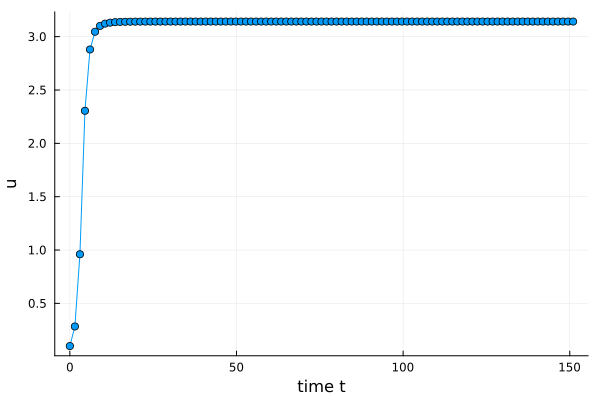

In [27]:
t_sq = [ n*Δt for n in 0:100 ]
plot(t_sq, u_sq, marker = :circ,
  xaxis = "time t", yaxis = "u", leg = false)

In [28]:
function Euler(u)
    return u + Δt * γ * (sin(u))^1.2
end

Euler (generic function with 1 method)

In [30]:
function Euler_all(init_u, N)
    u = init_u  # 最初の値
    for n in 1:N
      u = Euler(u)  # Euler スキームで新しい値を求める．
    end
    return u
end

Euler_all (generic function with 1 method)

In [31]:
function Symmetric_all(init_u, N)
    u = init_u  # 最初の値
    for n in 1:N
      u = nls(f, u, ini = u)[1]  # 関数 nls で新しい値を求める．
    end
    return u
  end

Symmetric_all (generic function with 1 method)

In [32]:
function RK_all(init_u, N)
    u = init_u  # 最初の値
    for n in 1:N
      u = RK(u)  # Runge-Kutta 法で新しい値を求める．
    end
    return u
  end

RK_all (generic function with 1 method)

In [33]:
Δt = 0.1 # この値で試すことにしよう

Euler_all(u0,100)

3.119420135870497

In [34]:
Symmetric_all(u0, 100)

3.1184787108216545

In [35]:
RK_all(u0, 100)

3.118421279457686

In [36]:
using BenchmarkTools

In [37]:
@benchmark Euler_all(u0, 100)

BenchmarkTools.Trial: 10000 samples with 7 evaluations.
 Range (min … max):  4.629 μs … 203.729 μs  ┊ GC (min … max): 0.00% … 96.26%
 Time  (median):     4.898 μs               ┊ GC (median):    0.00%
 Time  (mean ± σ):   5.026 μs ±   2.905 μs  ┊ GC (mean ± σ):  1.24% ±  2.59%

     ▄▇█▄                                                      
  ▂▃▅█████▄▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▂▂▂▂▂▂▂▁▂▂ ▃
  4.63 μs         Histogram: frequency by time        7.66 μs <

 Memory estimate: 6.27 KiB, allocs estimate: 401.

In [38]:
@benchmark Symmetric_all(u0, 100)

BenchmarkTools.Trial: 10000 samples with 1 evaluation.
 Range (min … max):  190.833 μs …   1.728 ms  ┊ GC (min … max): 0.00% … 86.89%
 Time  (median):     200.859 μs               ┊ GC (median):    0.00%
 Time  (mean ± σ):   210.998 μs ± 115.773 μs  ┊ GC (mean ± σ):  4.72% ±  7.43%

            ▂▅▆▆▅▅▄██▇▇▅▅▃▁                                      
  ▂▃▃▃▄▅▆▆▆████████████████▇▆▅▅▄▄▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▂▂▂▂▁▂ ▄
  191 μs           Histogram: frequency by time          226 μs <

 Memory estimate: 340.64 KiB, allocs estimate: 9001.

In [39]:
@benchmark RK_all(u0, 100)

BenchmarkTools.Trial: 10000 samples with 1 evaluation.
 Range (min … max):  23.346 μs … 347.317 μs  ┊ GC (min … max): 0.00% … 88.40%
 Time  (median):     24.460 μs               ┊ GC (median):    0.00%
 Time  (mean ± σ):   24.931 μs ±   8.211 μs  ┊ GC (mean ± σ):  0.88% ±  2.49%

       ▁▆██▅▃▁▁                                                 
  ▁▁▂▂▄█████████▇█████▇▇▆▅▅▃▄▂▃▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁ ▃
  23.3 μs         Histogram: frequency by time         28.5 μs <

 Memory estimate: 35.95 KiB, allocs estimate: 2301.

In [40]:
# 全体条件
T = 10.0 # この時間の…
u_exact = 3.1184213196530965 # 厳密解もどき．

ratio  = 1.5 # 計算回数を毎回 1.5倍する <=> Δt を毎回 2/3 に．
N_iter = 15  # この試行を何回やるか．

# 初期化
N = 100
Δt = T/N
u0 = 0.1

# 最初に一回計算しておく．
e_euler = Euler_all(u0,N) - u_exact
e_sym   = Symmetric_all(u0,N) - u_exact
e_rk    = RK_all(u0,N) - u_exact

println("iter, N, Δt, e_euler, e_sym, e_rk")  # 画面表示
println("0, $N, $Δt, $e_euler, $e_sym, $e_rk")

# 記録をとりはじめる．
sq_dt = [ Δt ]
sq_euler = [ e_euler ]
sq_sym   = [ e_sym ]
sq_rk    = [ e_rk ]

# Δt を小さくしていったときの近似解をそれぞれ求める．
for i in 1:N_iter
  N = round(Int, ratio * N) # N を ratio 倍して，
  Δt = T / N                # Δt は 1/ratio 倍になるはず．
  push!( sq_dt, Δt )        # 記録をとる

  e_euler = Euler_all(u0,N) - u_exact     # それぞれ計算
  e_sym   = Symmetric_all(u0,N) - u_exact
  e_rk    = RK_all(u0,N) - u_exact

  push!(sq_euler, e_euler)        # 記録をとる
  push!(sq_sym, e_sym)
  push!(sq_rk, e_rk)

  println("$i, $N, $Δt, $e_euler, $e_sym, $e_rk")  # 画面表示
end

iter, N, Δt, e_euler, e_sym, e_rk
0, 100, 0.1, 0.000998816217400389, 5.739116855796311e-5, -4.0195410555554645e-8
1, 150, 0.06666666666666667, 0.0006564740322243523, 2.5518718715478172e-5, -7.922887679256974e-9
2, 225, 0.044444444444444446, 0.0004334550057212283, 1.1257736344472136e-5, -1.5630248206832675e-9
3, 338, 0.029585798816568046, 0.0002866709631739184, 4.869136503327098e-6, -3.0667823835983654e-10
4, 507, 0.01972386587771203, 0.00019028442774038368, 2.065865582601134e-6, -6.054268197885904e-11
5, 760, 0.013157894736842105, 0.0001265708703082069, 8.775914253078554e-7, -1.198108279254484e-11
6, 1140, 0.008771929824561403, 8.421618377019158e-5, 3.9794948358817805e-7, -2.361666417982633e-12
7, 1710, 0.005847953216374269, 5.607101881643928e-5, 1.8996327044717987e-7, -4.60964599824365e-13
8, 2565, 0.003898635477582846, 3.734817716161132e-5, 1.1463056415195183e-7, -8.393286066166183e-14
9, 3848, 0.002598752598752599, 2.4881098828366532e-5, 5.093337351880223e-8, -1.021405182655144e-14


In [41]:
a1 = 2.0e-2
a2 = 2.0e-2
a4 = 2.0e-3
p1(t) = a1 * t
p2(t) = a2 * t^2
p4(t) = a4 * t^4

p4 (generic function with 1 method)

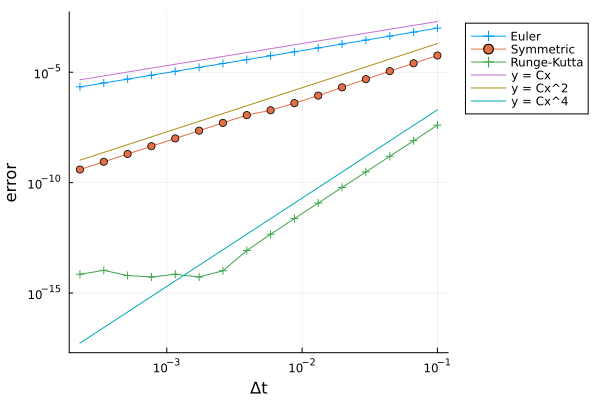

In [42]:
default( marker = :auto, xaxis = ("Δt", :log10),
    yaxis = ("error", :log10), legend = :outertopright )
# 共通の設定は default 宣言で一回だけすれば良い．

plot(sq_dt, abs.(sq_euler), label = "Euler")
plot!(sq_dt, abs.(sq_sym), label = "Symmetric")
plot!(sq_dt, abs.(sq_rk), label = "Runge-Kutta")

default(marker = :none)

plot!(sq_dt, p1.(sq_dt), label = "y = Cx")
plot!(sq_dt, p2.(sq_dt), label = "y = Cx^2")
plot!(sq_dt, p4.(sq_dt), label = "y = Cx^4")

In [43]:
function error_and_time(scheme, N)
    error, t = @timed (scheme(u0,N) - u_exact) # 値を求めて誤差の計算
    return (error, t) # 誤差と計算時間を返す
  end

error_and_time (generic function with 1 method)

In [44]:
# 間違いの無いように，念の為パラメータをあらためて設定しておく．
T = 10.0
N = 100
Δt  = T/N
u_exact = 3.1184213196530965 # 厳密解もどき．

error_and_time(Euler_all, 100) # こうすると，結果は下のように出るぞ．

(0.000998816217400389, 1.3601e-5)

In [45]:
# 全体条件
T = 10.0 # この時間の…
u_exact = 3.1184213196530965 # 厳密解もどき．

ratio  = 1.5 # 計算回数を毎回 1.5倍する <=> Δt を毎回 2/3 に．
N_iter = 15  # この試行を何回やるか．

# 初期化
N = 100
Δt = T/N
u0 = 0.1

# 最初に一回計算しておく．
e_euler, t_euler = error_and_time(Euler_all, N)
e_sym,   t_sym   = error_and_time(Symmetric_all, N)
e_rk,    t_rk    = error_and_time(RK_all, N)

println("iter, N, Δt")  # 画面表示
println("0, $N, $Δt")

# 記録をとりはじめる．
sq_dt = [ Δt ]
sq_e_euler = [ e_euler ]
sq_e_sym   = [ e_sym ]
sq_e_rk    = [ e_rk ]
sq_t_euler = [ t_euler ]
sq_t_sym   = [ t_sym ]
sq_t_rk    = [ t_rk ]

# Δt を小さくしていったときの近似解をそれぞれ求める．
for i in 1:N_iter
  N = round(Int, ratio * N) # N を ratio 倍して，
  Δt = T / N                # Δt は 1/ratio 倍になるはず．
  push!( sq_dt, Δt )        # 記録をとる

  e_euler, t_euler = error_and_time(Euler_all, N)
  e_sym,   t_sym   = error_and_time(Symmetric_all, N)
  e_rk,    t_rk    = error_and_time(RK_all, N)

  push!(sq_e_euler, e_euler)  # 記録をとる
  push!(sq_e_sym,   e_sym)
  push!(sq_e_rk,    e_rk)

  push!(sq_t_euler, t_euler)
  push!(sq_t_sym,   t_sym)
  push!(sq_t_rk,    t_rk)

  println("$i, $N, $Δt")  # 画面表示
end

iter, N, Δt
0, 100, 0.1
1, 150, 0.06666666666666667
2, 225, 0.044444444444444446
3, 338, 0.029585798816568046
4, 507, 0.01972386587771203
5, 760, 0.013157894736842105
6, 1140, 0.008771929824561403
7, 1710, 0.005847953216374269
8, 2565, 0.003898635477582846
9, 3848, 0.002598752598752599
10, 5772, 0.0017325017325017325
11, 8658, 0.001155001155001155
12, 12987, 0.00077000077000077
13, 19480, 0.000513347022587269
14, 29220, 0.00034223134839151266
15, 43830, 0.00022815423226100844


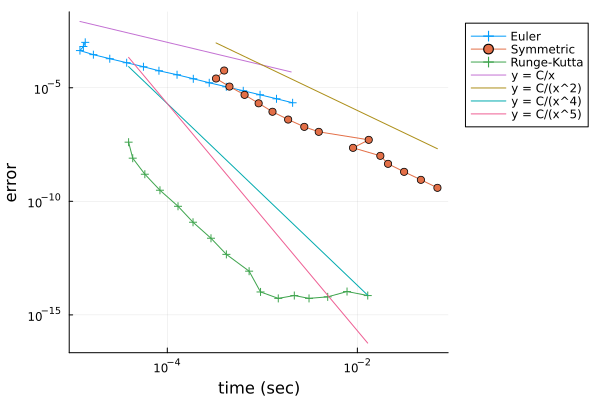

In [46]:
n1(t) = 1.0e-7 / t
n2(t) = 1.0e-10 / (t^2)
n4(t) = 2.0e-22 / (t^4)
n5(t) = 2.0e-26 / (t^5)

t_range_euler = minimum(sq_t_euler):0.0001:maximum(sq_t_euler)
t_range_sym = minimum(sq_t_sym):0.0001:maximum(sq_t_sym)
t_range_rk = minimum(sq_t_rk):0.0001:maximum(sq_t_rk)

default( marker = :auto, xaxis = ("time (sec)", :log10),
    yaxis = ("error", :log10), legend = :outertopright )

plot(sq_t_euler, abs.(sq_e_euler), label = "Euler")
plot!(sq_t_sym, abs.(sq_e_sym), label = "Symmetric")
plot!(sq_t_rk, abs.(sq_e_rk), label = "Runge-Kutta")

default(marker = :none)

plot!(t_range_euler, n1.(t_range_euler), label = "y = C/x")
plot!(t_range_sym, n2.(t_range_sym), label = "y = C/(x^2)")
plot!(t_range_rk, n4.(t_range_rk), label = "y = C/(x^4)")
plot!(t_range_rk, n5.(t_range_rk), label = "y = C/(x^5)")
